In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df1=pd.read_csv("loan_data.csv")
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df1 = pd.get_dummies(df1,['purpose'],drop_first=True)
df1 = df1.drop('credit.policy',axis=1)
df1.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [4]:
df2=df1.drop('not.fully.paid',axis=1)

In [5]:
from itertools import combinations

## k-means clustering

In [10]:
from sklearn.cluster import KMeans

### Unlabled data

In [11]:
X=df2

In [12]:
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [13]:
y=df1['not.fully.paid']

### Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_scaled=scaler.fit_transform(X)

### Metrics

In [17]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [18]:
from sklearn.metrics import silhouette_score

In [23]:
from sklearn.metrics import adjusted_rand_score

In [24]:
from sklearn.metrics import completeness_score

In [25]:
from sklearn.metrics.cluster import homogeneity_score

In [26]:
from sklearn.metrics import v_measure_score

### Creating the baseline k-means model

In [20]:
t1=time.time()
km = KMeans(n_clusters=5,n_init=10,max_iter=500).fit(X=X_scaled)
t2=time.time()
time_km = t2-t1

In [21]:
preds_km = km.predict(X_scaled)

In [97]:
X_km=km.transform(X_scaled)

In [98]:
X_km.shape

(9578, 5)

## PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
n_prin_comp = 6

In [24]:
pca_partial = PCA(n_components=n_prin_comp,svd_solver='full')
pca_partial.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [25]:
pca_full = PCA(n_components=11,svd_solver='full')
pca_full.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

### Eigenvalues

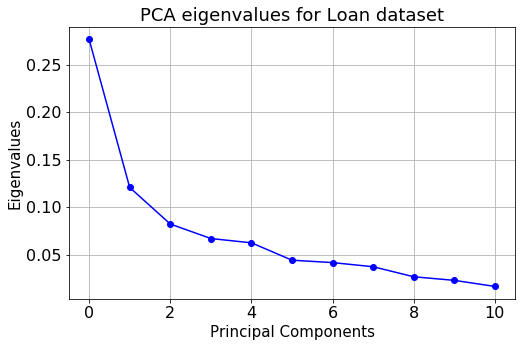

In [26]:
plt.figure(figsize=(8,5))
plt.title("PCA eigenvalues for Loan dataset", fontsize=18)
plt.plot(pca_full.explained_variance_,'b-o')
plt.grid(True)
plt.xticks(fontsize=16)
plt.xlabel("Principal Components",fontsize=15)
plt.yticks(fontsize=16)
plt.ylabel("Eigenvalues",fontsize=15)
plt.show()

### How much variance is explained by principal components?

In [27]:
pca_explained_var = pca_full.explained_variance_ratio_

In [28]:
cum_explaiend_var = pca_explained_var.cumsum()

In [29]:
cum_explaiend_var

array([0.33835481, 0.48599537, 0.58655369, 0.66841218, 0.74474625,
       0.798709  , 0.84957275, 0.89510691, 0.92772571, 0.95572259,
       0.97588551])

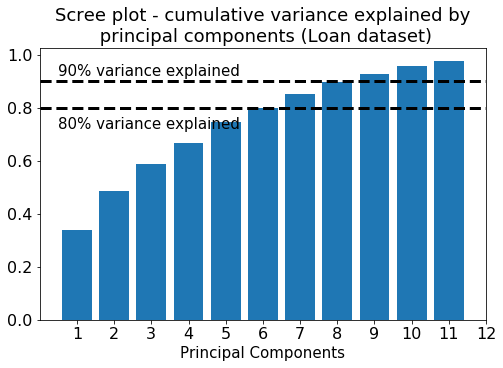

In [30]:
plt.figure(figsize=(8,5))
plt.title("Scree plot - cumulative variance explained by\n principal components (Loan dataset)", fontsize=18)
plt.bar(range(1,12),cum_explaiend_var)
plt.xticks([i for i in range(1,13)],fontsize=16)
plt.xlabel("Principal Components",fontsize=15)
plt.yticks(fontsize=16)
plt.xlim(0,12)
plt.hlines(y=0.8,xmin=0,xmax=12,linestyles='dashed',lw=3)
plt.text(x=0.5,y=0.72,s="80% variance explained",fontsize=15)
plt.hlines(y=0.9,xmin=0,xmax=12,linestyles='dashed',lw=3)
plt.text(x=0.5,y=0.92,s="90% variance explained",fontsize=15)
plt.show()

### Transform the original variables in principal component space and create a DataFrame

In [31]:
X_pca = pca_partial.fit_transform(X_scaled)

In [32]:
df_pca=pd.DataFrame(data=X_pca,columns=['Principal_comp'+str(i) for i in range(1,n_prin_comp+1)])

In [33]:
df_pca.shape

(9578, 6)

### K-means fitting with PCA-transformed data

In [34]:
t1=time.time()
km_pca = KMeans(n_clusters=5,n_init=10,max_iter=500).fit(X=X_pca)
t2=time.time()
time_km_pca = t2-t1
preds_km_pca = km_pca.predict(X_pca)

### Estimating average running time of k-means with PCA

In [35]:
time_km_pca = []
for i in range(10):
    t1=time.time()
    km_pca = KMeans(n_clusters=5,n_init=10,max_iter=500).fit(X=X_pca)
    t2= time.time()
    delta = t2-t1
    time_km_pca.append(delta)
time_km_pca = np.array(time_km_pca)
avg_time_km_pca = time_km_pca.mean()
print(avg_time_km_pca)

0.17692029476165771


## ICA

In [36]:
from sklearn.decomposition import FastICA

In [37]:
n_ind_comp = 6

In [38]:
ica_partial = FastICA(n_components=n_ind_comp)
ica_partial.fit(X_scaled)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=6, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [39]:
ica_full = FastICA(max_iter=1000)
ica_full.fit(X_scaled)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=1000,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [40]:
X_ica = ica_partial.fit_transform(X_scaled)

In [41]:
df_ica=pd.DataFrame(data=X_ica,columns=['Independent_comp'+str(i) for i in range(1,n_ind_comp+1)])

### Kurtosis

In [42]:
from scipy.stats import kurtosis

In [43]:
X_ica_full = ica_full.fit_transform(X_scaled)

In [44]:
kurt = kurtosis(X_ica_full,fisher=True)

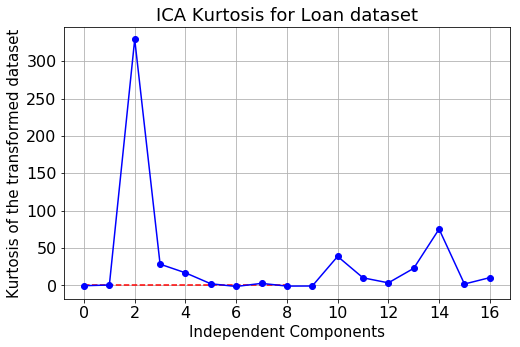

In [45]:
plt.figure(figsize=(8,5))
plt.title("ICA Kurtosis for Loan dataset", fontsize=18)
plt.plot(kurt,'b-o')
plt.grid(True)
plt.xticks(fontsize=16)
plt.xlabel("Independent Components",fontsize=15)
plt.yticks(fontsize=16)
plt.ylabel("Kurtosis of the transformed dataset",fontsize=15)
plt.hlines(y = 0, xmin=0, xmax=8,colors='red',linestyles='dashed')
plt.show()

### K-means fitting with ICA-transformed data

In [46]:
t1=time.time()
km_ica = KMeans(n_clusters=5,n_init=10,max_iter=500).fit(X=X_ica)
t2=time.time()
time_km_ica = t2-t1

# Predictions
preds_km_ica = km_ica.predict(X_ica)

### Estimating average running time of k-means with ICA

In [47]:
time_km_ica = []
for i in range(10):
    t1=time.time()
    km_ica = KMeans(n_clusters=6,n_init=10,max_iter=500).fit(X=X_ica)
    t2= time.time()
    delta = t2-t1
    time_km_ica.append(delta)
time_km_ica = np.array(time_km_ica)
avg_time_km_ica = time_km_ica.mean()
print(avg_time_km_ica)

0.26158316135406495


## Neural network on reduced-dimension dataset

In [48]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

c:\users\tirtha\python\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
df_pca['y']=df1['not.fully.paid']

In [50]:
df_pca.head()

,Principal_comp1,Principal_comp2,Principal_comp3,Principal_comp4,Principal_comp5,Principal_comp6,y
0,0.655362,0.057307,-0.000409,0.305886,0.248747,0.276088,0
1,-0.582427,0.776568,-0.192399,-0.012066,-0.010517,-0.076140,0
2,0.589855,-0.067735,-0.120468,0.058196,-0.012551,-0.034902,0
3,0.588644,-0.018456,-0.129802,-0.090544,-0.093617,-0.139096,0
4,-0.603098,0.725640,-0.200946,-0.048541,-0.065525,-0.136860,0


### Test/train split

In [51]:
from sklearn.model_selection import train_test_split

### Function to construct 2-hidden-layer Keras model

In [53]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=keras.optimizers.SGD(lr=learning_rate)
    if optimizer=='Adam':
        optimizer=keras.optimizers.Adam(lr=learning_rate)
    if optimizer=='RMSprop':
        optimizer=keras.optimizers.RMSprop(lr=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

### Function to run the NN model

In [54]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', 
                                   verbose=verbosity, save_best_only=True)
    
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val), 
              verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['acc'],color='red')
        plt.plot(hist.history['val_acc'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

### Function to test the NN model

In [55]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

### Prepare data for PCA dataset

In [80]:
X=df_pca.drop('y',axis=1)
y=df_pca['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50,random_state=101)

n_input=X_pca.shape[0]
num_classes = len(y_train.unique())
input_dim=X_train.shape[1]

### Basic run of the neural network (using Adam optimizer)

In [81]:
nn_model_pca=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')

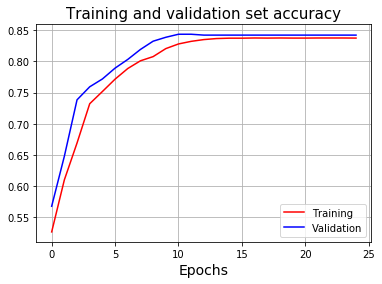

Training done, took 6.0699522495269775 seconds


In [82]:
t1=time.time()
hist_pca=run_NN(nn_model_pca,X_train,y_train,X_val,y_val,verbosity=0,batch_size=64,
            num_epochs=25,plot_loss=True)
t2=time.time()
time_NN_pca = t2-t1
print("Training done, took {} seconds".format(time_NN_pca))

In [72]:
pca_nn_accuracy = hist_pca.model.evaluate(X_test,y_test)[1]
print(pca_nn_accuracy)

1437/1437 [==============================] - 0s 41us/step
0.8336812800720655


### Neural network on the original dataset

In [84]:
X=df2
y=df_pca['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50,random_state=101)

n_input=X_pca.shape[0]
num_classes = len(y_train.unique())
input_dim=X_train.shape[1]

In [85]:
nn_model_full=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')

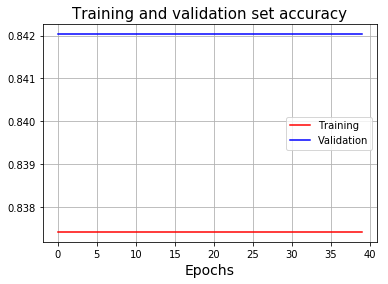

Training done, took 7.245376825332642 seconds


In [90]:
t1=time.time()
hist_full=run_NN(nn_model_full,X_train,y_train,X_val,y_val,verbosity=0,batch_size=64,
            num_epochs=40,plot_loss=True)
t2=time.time()
time_NN_full = t2-t1
print("Training done, took {} seconds".format(time_NN_full))

In [88]:
full_nn_accuracy = hist_full.model.evaluate(X_test,y_test)[1]
print(full_nn_accuracy)

1437/1437 [==============================] - 0s 41us/step
0.8496868473088153


### Neural network model for ICA

In [91]:
X=df_pca.drop('y',axis=1)
y=df1['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50,random_state=101)

input_dim=X_train.shape[1]

In [92]:
nn_model_ica=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')

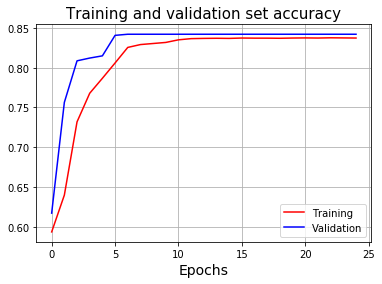

Training done, took 6.356657028198242 seconds


In [93]:
t1=time.time()
hist_ica=run_NN(nn_model_ica,X_train,y_train,X_val,y_val,verbosity=0,batch_size=64,
            num_epochs=25,plot_loss=True)
t2=time.time()
time_NN_ica = t2-t1
print("Training done, took {} seconds".format(time_NN_ica))

### Neural network with k-means transformed data

In [99]:
X=X_km
y=df1['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50,random_state=101)

input_dim=X_train.shape[1]

In [100]:
nn_model_km=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')

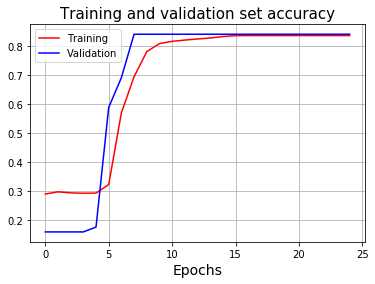

Training done, took 6.45279335975647 seconds


In [101]:
t1=time.time()
hist_km=run_NN(nn_model_km,X_train,y_train,X_val,y_val,verbosity=0,batch_size=64,
            num_epochs=25,plot_loss=True)
t2=time.time()
time_NN_km = t2-t1
print("Training done, took {} seconds".format(time_NN_km))

## Random Projection

In [94]:
from sklearn.random_projection import GaussianRandomProjection

In [95]:
n_random_comp = 5

In [96]:
random_proj = GaussianRandomProjection(n_components=n_random_comp)

In [97]:
X_random_proj = random_proj.fit_transform(X_scaled)

In [98]:
df_random_proj=pd.DataFrame(data=X_random_proj,columns=['Random_projection'+str(i) for i in range(1,n_random_comp+1)])

### Running k-means on random projections

In [99]:
km_sse= []
km_silhouette = []
km_vmeasure =[]
km_ami = []
km_homogeneity = []
km_completeness = []

cluster_range = (2,12)

for i in range(cluster_range[0],cluster_range[1]):
    km = KMeans(n_clusters=i, random_state=0).fit(X_random_proj)
    preds = km.predict(X_random_proj)
    km_sse.append(-km.score(X_random_proj))
    km_silhouette.append(silhouette_score(X_random_proj,preds))
    km_vmeasure.append(v_measure_score(y,preds))
    km_ami.append(adjusted_mutual_info_score(y,preds))
    km_homogeneity.append(homogeneity_score(y,preds))
    km_completeness.append(completeness_score(y,preds))
    print(f"Done for cluster {i}")

Done for cluster 2
Done for cluster 3
Done for cluster 4
Done for cluster 5
Done for cluster 6
Done for cluster 7
Done for cluster 8
Done for cluster 9
Done for cluster 10
Done for cluster 11


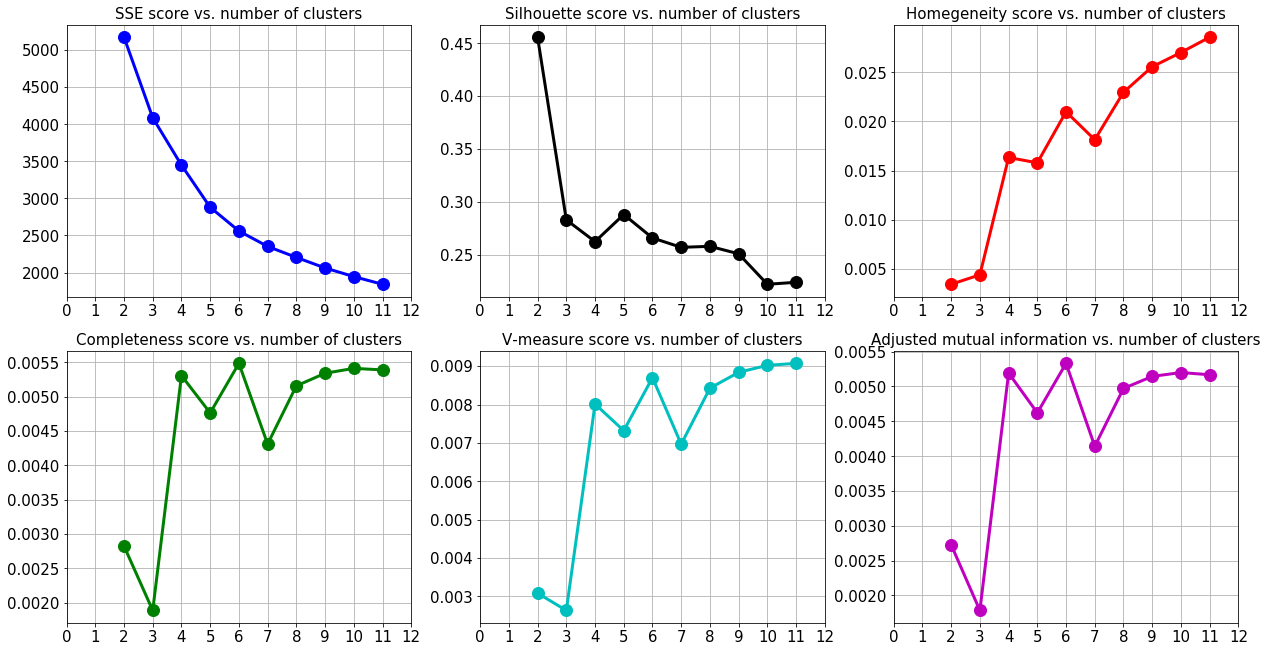

In [100]:
plt.figure(figsize=(21,11))

#SSE
plt.subplot(2,3,1)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_sse,'b-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("SSE score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Silhouette
plt.subplot(2,3,2)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_silhouette,'k-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Silhouette score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Homegeneity
plt.subplot(2,3,3)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_homogeneity,'r-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Homegeneity score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Completeness
plt.subplot(2,3,4)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_completeness,'g-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Completeness score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#V-measure
plt.subplot(2,3,5)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_vmeasure,'c-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("V-measure score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Adjusted mutual information
plt.subplot(2,3,6)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_ami,'m-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Adjusted mutual information vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### K-means fitting with random-projected data

In [101]:
t1=time.time()
km_random_proj = KMeans(n_clusters=6,n_init=10,max_iter=500).fit(X=X_random_proj)
t2=time.time()
time_km_rp = t2-t1
preds_km_random_proj = km_random_proj.predict(X_random_proj)

### Visualizing the clusters after running k-means on random-projected features

In [102]:
col_random_proj_combi=list(combinations(df_random_proj.columns,2))
num_random_proj_combi = len(col_random_proj_combi)

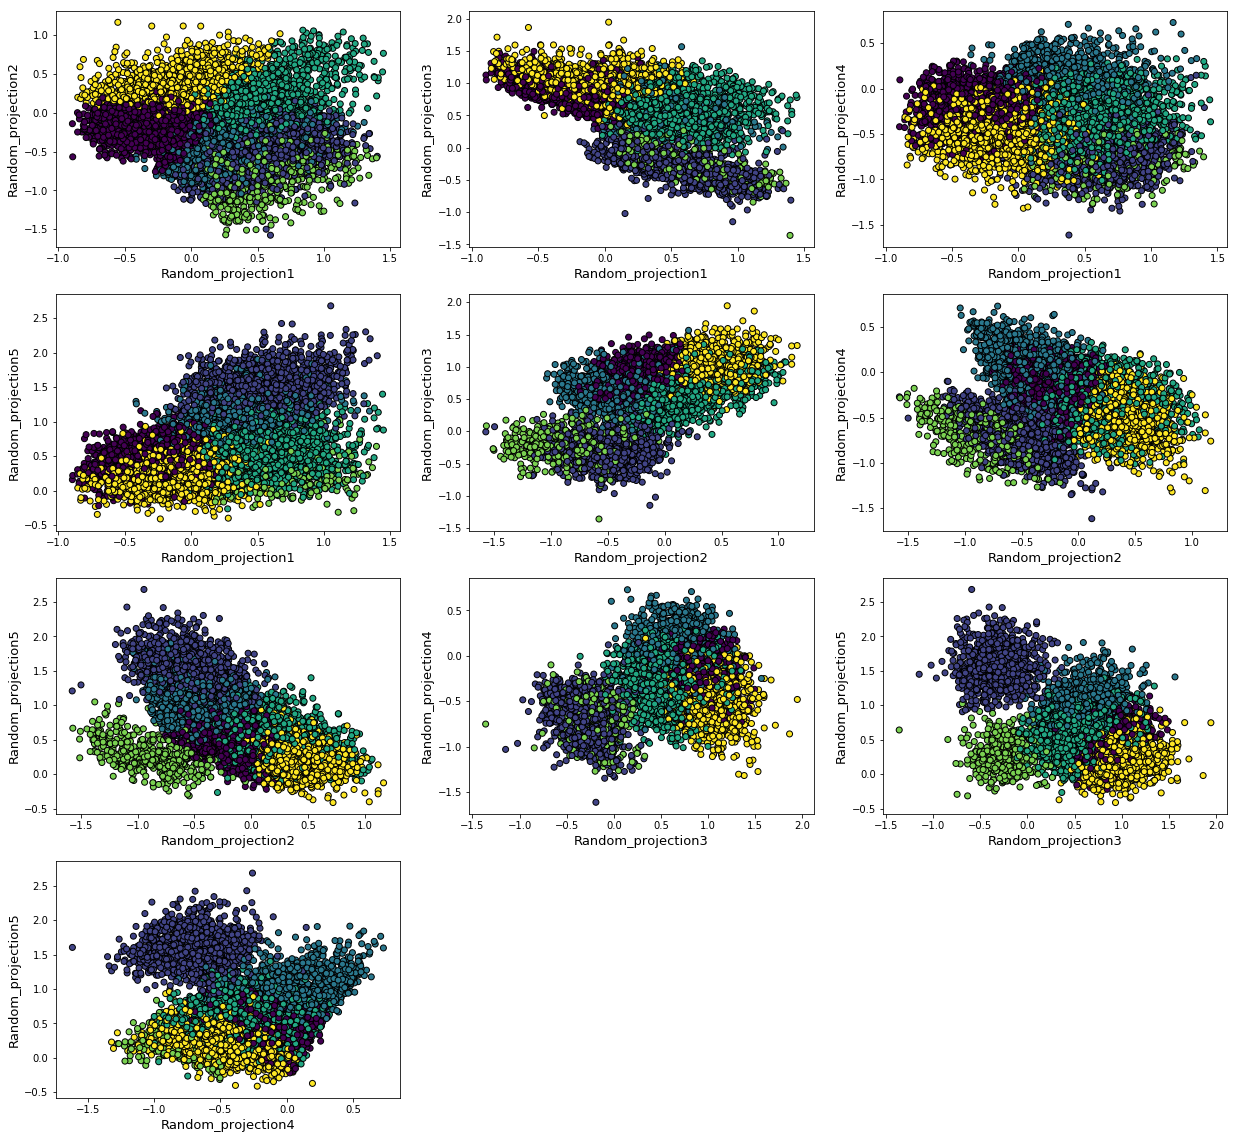

In [103]:
plt.figure(figsize=(21,20))
for i in range(1,num_random_proj_combi+1):
    plt.subplot(int(num_random_proj_combi/3)+1,3,i)
    dim1=col_random_proj_combi[i-1][0]
    dim2=col_random_proj_combi[i-1][1]
    plt.scatter(df_random_proj[dim1],df_random_proj[dim2],c=preds_km_random_proj,edgecolor='k')
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)
plt.show()

### Estimating average running time of k-means with random projections

In [104]:
time_km_rp = []
for i in range(10):
    t1=time.time()
    km_rp = KMeans(n_clusters=6,n_init=10,max_iter=500).fit(X=X_random_proj)
    t2= time.time()
    delta = t2-t1
    time_km_rp.append(delta)
time_km_rp = np.array(time_km_rp)
avg_time_km_rp = time_km_rp.mean()
print(avg_time_km_rp)

0.9013517141342163


In [ ]:
def plot_cluster_rp(df_rp,preds_rp):
    """
    Plots clusters after running random projection
    """
    plt.figure(figsize=(21,12))
    for i in range(1,num_random_proj_combi+1):
        plt.subplot(int(num_random_proj_combi/3)+1,3,i)
        dim1=col_random_proj_combi[i-1][0]
        dim2=col_random_proj_combi[i-1][1]
        plt.scatter(df_rp[dim1],df_rp[dim2],c=preds_rp,edgecolor='k')
        plt.xlabel(f"{dim1}",fontsize=13)
        plt.ylabel(f"{dim2}",fontsize=13)
    plt.show()

### Running the random projections many times

In [ ]:
rp_score= []
rp_silhouette = []
rp_vmeasure = []
for i in range(20):
    random_proj = GaussianRandomProjection(n_components=n_random_comp)
    X_random_proj = random_proj.fit_transform(X_scaled)
    df_random_proj=pd.DataFrame(data=X_random_proj,columns=['Random_projection'+str(i) for i in range(1,n_random_comp+1)])
    
    km = KMeans(n_clusters=5, random_state=0).fit(X_random_proj)
    preds = km.predict(X_random_proj)
    print("Score for iteration {}: {}".format(i,km.score(X_random_proj)))
    rp_score.append(-km.score(X_random_proj))
    
    silhouette = silhouette_score(X_random_proj,preds)
    rp_silhouette.append(silhouette)
    print("Silhouette score for iteration {}: {}".format(i,silhouette))
    
    v_measure = v_measure_score(y,preds)
    rp_vmeasure.append(v_measure)
    print("V-measure score for iteration {}: {}".format(i,v_measure))
    print("-"*100)
    
    #plot_cluster_rp(df_random_proj,preds)

In [ ]:
plt.scatter(x=[i for i in range(20)],y=rp_score)
plt.show()

In [ ]:
plt.scatter(x=[i for i in range(20)],y=rp_silhouette)
plt.show()

In [ ]:
plt.scatter(x=[i for i in range(20)],y=rp_vmeasure)
plt.show()

### This kind of variation does not happen with PCA

In [ ]:
pca_score= []
pca_silhouette = []
pca_vmeasure = []
for i in range(20):
    pca_partial = PCA(n_components=n_prin_comp,svd_solver='full')
    X_pca=pca_partial.fit_transform(X_scaled)
    km = KMeans(n_clusters=5, random_state=0).fit(X_pca)
    preds = km.predict(X_pca)
    print("Score for iteration {}: {}".format(i,km.score(X_pca)))
    rp_score.append(-km.score(X_pca))
    silhouette = silhouette_score(X_pca,preds)
    rp_silhouette.append(silhouette)
    print("Silhouette score for iteration {}: {}".format(i,silhouette))
    v_measure = v_measure_score(y,preds)
    rp_vmeasure.append(v_measure)
    print("V-measure score for iteration {}: {}".format(i,v_measure))
    print("-"*100)

### Testing cluster accuracy function

In [ ]:
def cluster_acc(Y,clusterLabels):
    import numpy as np
    from collections import Counter
    from sklearn.metrics import accuracy_score as acc
    assert (Y.shape == clusterLabels.shape)
    pred = np.empty_like(Y)
    for label in set(clusterLabels):
        mask = clusterLabels == label
        sub = Y[mask]
        target = Counter(sub).most_common(1)[0][0]
        pred[mask] = target
#    assert max(pred) == max(Y)
#    assert min(pred) == min(Y)    
    return acc(Y,pred)

In [ ]:
adjusted_rand_score(y,preds_gm)

In [ ]:
adjusted_rand_score(y,preds_km)

In [ ]:
adjusted_rand_score(y,preds_km_pca)

In [ ]:
adjusted_rand_score(y,preds_km_ica)

In [ ]:
adjusted_rand_score(y,preds_km_random_proj)

## Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

print(X_scaled.shape)

clf = RandomForestClassifier(n_estimators=100,max_depth=3)
clf = clf.fit(X_scaled, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_fs = model.transform(X_scaled)

print(X_new.shape)

### Running k-means on new transformed dataset after feature selection

In [ ]:
km_sse= []
km_silhouette = []
km_vmeasure =[]
km_ami = []
km_homogeneity = []
km_completeness = []

cluster_range = (2,12)

for i in range(cluster_range[0],cluster_range[1]):
    km = KMeans(n_clusters=i, random_state=0).fit(X_fs)
    preds = km.predict(X_fs)
    km_sse.append(-km.score(X_fs))
    km_silhouette.append(silhouette_score(X_fs,preds))
    km_vmeasure.append(v_measure_score(y,preds))
    km_ami.append(adjusted_mutual_info_score(y,preds))
    km_homogeneity.append(homogeneity_score(y,preds))
    km_completeness.append(completeness_score(y,preds))
    print(f"Done for cluster {i}")

In [ ]:
plt.figure(figsize=(21,11))

#SSE
plt.subplot(2,3,1)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_sse,'b-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("SSE score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Silhouette
plt.subplot(2,3,2)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_silhouette,'k-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Silhouette score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Homegeneity
plt.subplot(2,3,3)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_homogeneity,'r-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Homegeneity score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Completeness
plt.subplot(2,3,4)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_completeness,'g-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Completeness score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#V-measure
plt.subplot(2,3,5)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_vmeasure,'c-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("V-measure score vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

#Adjusted mutual information
plt.subplot(2,3,6)
plt.plot([i for i in range(cluster_range[0],cluster_range[1])],km_ami,'m-o',linewidth=3,markersize=12)
plt.grid(True)
plt.title("Adjusted mutual information vs. number of clusters",fontsize=15)
plt.xticks([i for i in range(0,cluster_range[1]+1,1)],fontsize=15)
plt.yticks(fontsize=15)

plt.show()